# Titanic - Machine Learning from Disaster

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
import re
import warnings
print(os.listdir("./"))

['.DS_Store', 'test.csv', 'README.md', 'train.csv', '.ipynb_checkpoints', 'Titanic-notebook.ipynb', '.git', 'gender_submission.csv']


In [2]:
# Load training Data
train_df = pd.read_csv("train.csv")
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

891 observations for 11 variables
Variables with null values: Age, Cabin and Embarked

In [5]:
# separate numerical and categorical variables while maintaining labels
train_num = train_df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [6]:
# Describe numerical data
train_num.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


## Visualizing the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Examine the correlation of numerical data
print(train_num.corr())

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.077221 -0.035322  0.081629  0.257307
Age      -0.077221  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307  0.096067  0.159651  0.216225  1.000000


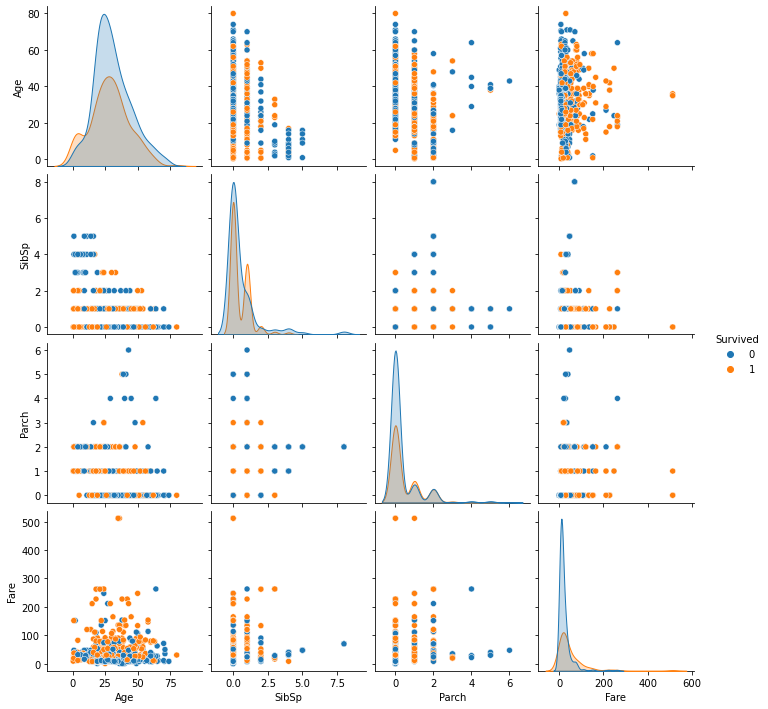

In [9]:
# Distribution and corelation plots for numerical variables
sns.pairplot(train_num, hue='Survived')
plt.show()

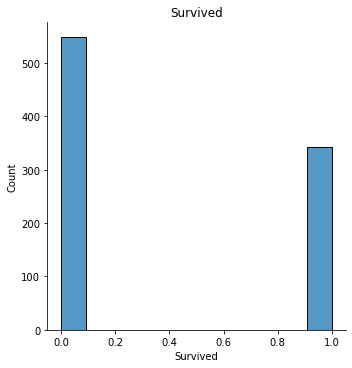

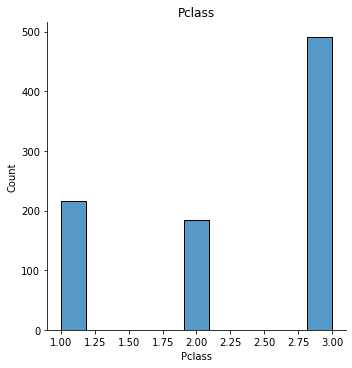

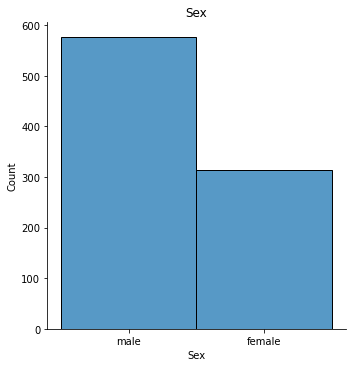

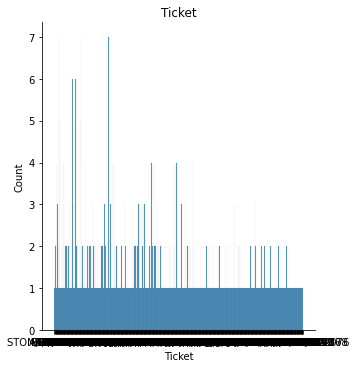

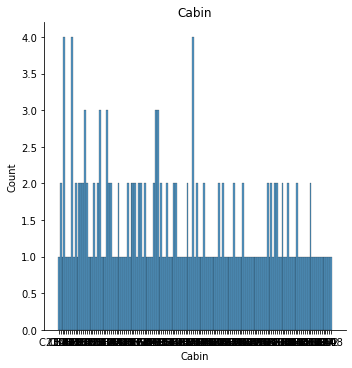

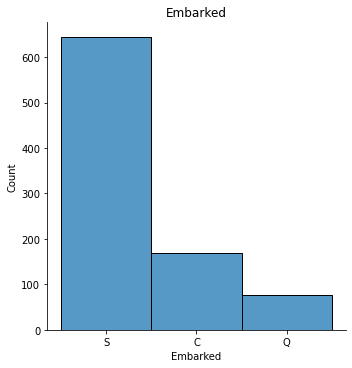

In [10]:
# Distribution Plots for categorical variables
for i in train_cat.columns:
    sns.displot(train_cat[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='Sex', ylabel='PassengerId'>

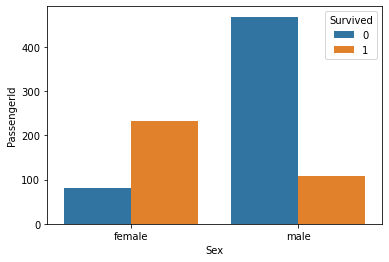

In [41]:
# We try to see how the Gender would affect Survival
gender_df = train_df[['PassengerId','Survived','Sex']].groupby(['Survived','Sex']).count().reset_index()
sns.barplot(data=gender_df, x='Sex', y='PassengerId', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>

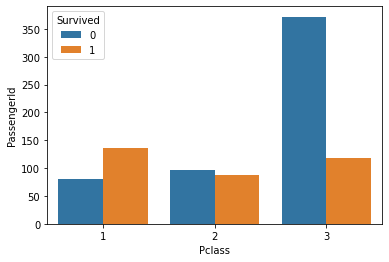

In [45]:
# We try to see Passenger class would affect Survival
class_df = train_df[['PassengerId','Survived','Pclass']].groupby(['Survived','Pclass']).count().reset_index()
sns.barplot(data=class_df, x='Pclass', y='PassengerId', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='PassengerId'>

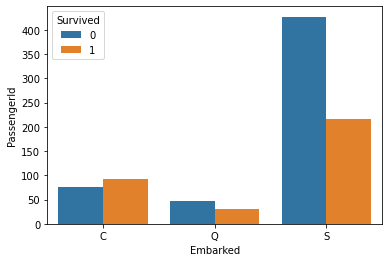

In [47]:
# We try to see how port of embarkation would affect Survival
port_df = train_df[['PassengerId','Survived','Embarked']].groupby(['Survived','Embarked']).count().reset_index()
sns.barplot(data=port_df,x='Embarked', y='PassengerId', hue='Survived')

## Feature Engineering

In [55]:
# We try to look deeper into the ticket variable
train_df['Ticket'].value_counts()

CA. 2343     7
1601         7
347082       7
CA 2144      6
347088       6
            ..
374746       1
W/C 14208    1
347073       1
2626         1
234686       1
Name: Ticket, Length: 681, dtype: int64

In [56]:
# We try to look deeper into the Cabin variable
train_df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F33            3
              ..
A32            1
D15            1
B79            1
E10            1
B78            1
Name: Cabin, Length: 147, dtype: int64

In [61]:
# We create new vaiables to represent the length of the cabin number and the letter category and check how this affects survival
train_df['cabin_len'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_df['cabin_let'] = train_df['Cabin'].apply(lambda x: str(x)[0])

<AxesSubplot:xlabel='cabin_len', ylabel='PassengerId'>

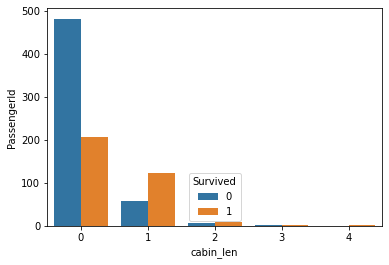

In [63]:
# We try to see the length of cabin number would affect Survival
cabin_len_df = train_df[['PassengerId','Survived','cabin_len']].groupby(['Survived','cabin_len']).count().reset_index()
sns.barplot(data=cabin_len_df, x='cabin_len', y='PassengerId', hue='Survived')

<AxesSubplot:xlabel='cabin_let', ylabel='PassengerId'>

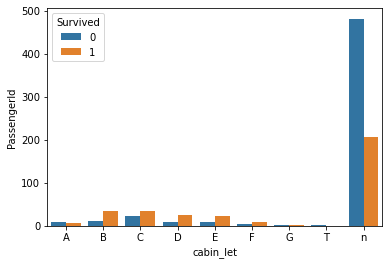

In [64]:
# We try to see the category of cabin number would affect Survival
cabin_let_df = train_df[['PassengerId','Survived','cabin_let']].groupby(['Survived','cabin_let']).count().reset_index()
sns.barplot(data=cabin_let_df, x='cabin_let', y='PassengerId', hue='Survived')